<a href="https://colab.research.google.com/github/kdemertzis/LNexamples/blob/main/Decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

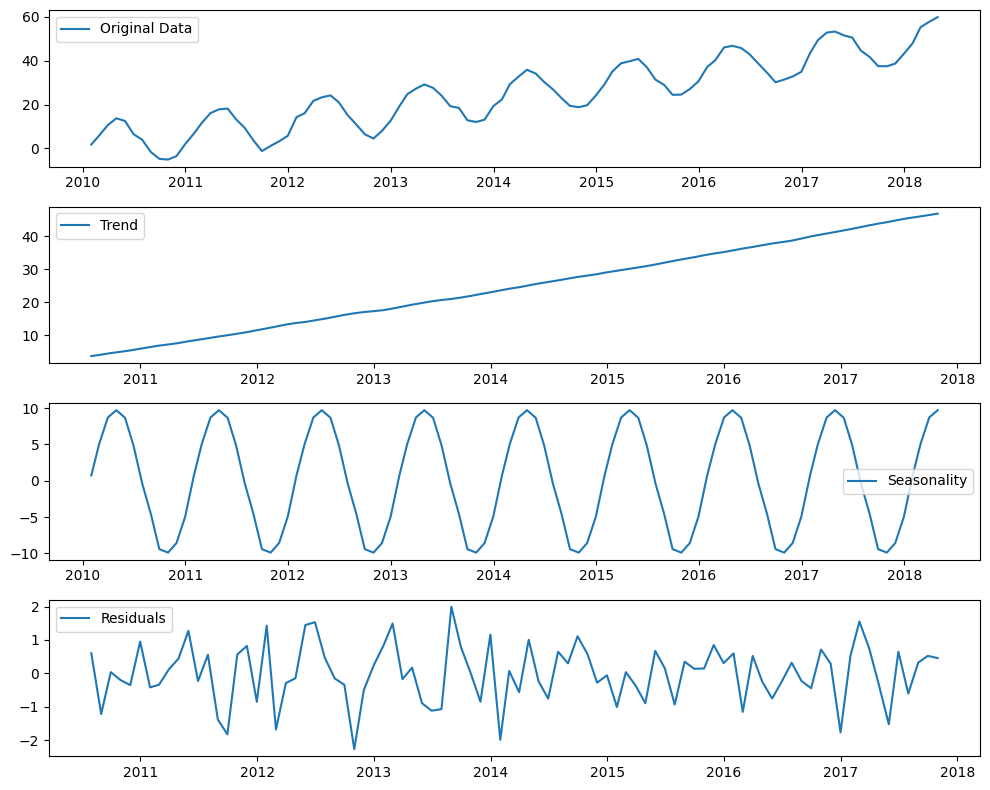

Trend function:
2010-07-31     3.706420
2010-08-31     4.153024
2010-09-30     4.619135
2010-10-31     5.017381
2010-11-30     5.422352
                ...    
2017-06-30    45.026034
2017-07-31    45.557912
2017-08-31    45.991755
2017-09-30    46.443343
2017-10-31    46.923761
Freq: M, Name: trend, Length: 88, dtype: float64
Seasonality function:
2010-01-31    0.733843
2010-02-28    5.070304
2010-03-31    8.722861
2010-04-30    9.723851
2010-05-31    8.674229
                ...   
2017-12-31   -4.937323
2018-01-31    0.733843
2018-02-28    5.070304
2018-03-31    8.722861
2018-04-30    9.723851
Freq: M, Name: seasonal, Length: 100, dtype: float64
Predicted residuals:
2010-07-31    0.604655
2010-08-31   -1.214621
2010-09-30    0.038252
2010-10-31   -0.201258
2010-11-30   -0.348768
                ...   
2017-06-30    0.649257
2017-07-31   -0.600102
2017-08-31    0.320451
2017-09-30    0.525537
2017-10-31    0.458402
Freq: M, Name: resid, Length: 88, dtype: float64


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Generate synthetic data
np.random.seed(0)
n = 100
time = pd.date_range(start='2010-01-01', periods=n, freq='M')
trend = 0.5 * np.arange(n)
seasonality = 10 * np.sin(2 * np.pi * np.arange(n) / 12)
noise = np.random.normal(0, 1, n)
data = trend + seasonality + noise

# Convert data to a Pandas Series with a DatetimeIndex
series = pd.Series(data, index=time)

# Perform time series decomposition
decomposition = seasonal_decompose(series, model='additive')

# Access decomposition components
trend_component = decomposition.trend
seasonality_component = decomposition.seasonal
residual_component = decomposition.resid

# Plot original data and components
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(series, label='Original Data')
plt.legend()

plt.subplot(412)
plt.plot(trend_component, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(seasonality_component, label='Seasonality')
plt.legend()

plt.subplot(414)
plt.plot(residual_component, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()

# Print trend function
print("Trend function:")
print(trend_component.dropna())

# Print seasonality function
print("Seasonality function:")
print(seasonality_component.dropna())

# Predict the residuals
def predict_residuals(model, time):
    predicted_residuals = model.resid.dropna()
    return predicted_residuals

predicted_residuals = predict_residuals(decomposition, time)
print("Predicted residuals:")
print(predicted_residuals)


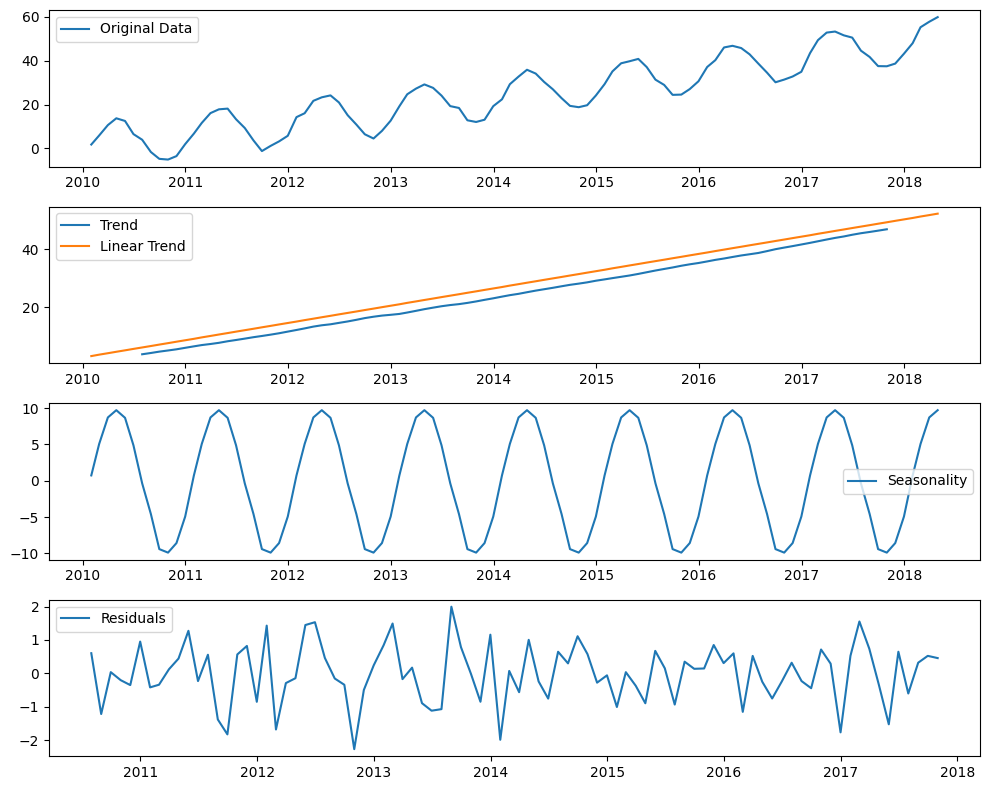

Trend function:
2010-07-31     3.706420
2010-08-31     4.153024
2010-09-30     4.619135
2010-10-31     5.017381
2010-11-30     5.422352
                ...    
2017-06-30    45.026034
2017-07-31    45.557912
2017-08-31    45.991755
2017-09-30    46.443343
2017-10-31    46.923761
Freq: M, Name: trend, Length: 88, dtype: float64
Seasonality function:
2010-01-31    0.733843
2010-02-28    5.070304
2010-03-31    8.722861
2010-04-30    9.723851
2010-05-31    8.674229
                ...   
2017-12-31   -4.937323
2018-01-31    0.733843
2018-02-28    5.070304
2018-03-31    8.722861
2018-04-30    9.723851
Freq: M, Name: seasonal, Length: 100, dtype: float64
Predicted residuals:
2010-07-31    0.604655
2010-08-31   -1.214621
2010-09-30    0.038252
2010-10-31   -0.201258
2010-11-30   -0.348768
                ...   
2017-06-30    0.649257
2017-07-31   -0.600102
2017-08-31    0.320451
2017-09-30    0.525537
2017-10-31    0.458402
Freq: M, Name: resid, Length: 88, dtype: float64


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Generate synthetic data
np.random.seed(0)
n = 100
time = pd.date_range(start='2010-01-01', periods=n, freq='M')
trend = 0.5 * np.arange(n)
seasonality = 10 * np.sin(2 * np.pi * np.arange(n) / 12)
noise = np.random.normal(0, 1, n)
data = trend + seasonality + noise

# Convert data to a Pandas Series with a DatetimeIndex
series = pd.Series(data, index=time)

# Perform time series decomposition
decomposition = seasonal_decompose(series, model='additive')

# Access decomposition components
trend_component = decomposition.trend
seasonality_component = decomposition.seasonal
residual_component = decomposition.resid

# Create the x values
x = np.arange(len(series))

# Calculate linear trend line
valid_trend = trend_component.dropna()
valid_x = x[:len(valid_trend)]
coefficients = np.polyfit(valid_x, valid_trend, deg=1)
linear_trend = np.polyval(coefficients, x)

# Plot original data, trend, and components
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(series, label='Original Data')
plt.legend()

plt.subplot(412)
plt.plot(trend_component, label='Trend')
plt.plot(time, linear_trend, label='Linear Trend')
plt.legend()

plt.subplot(413)
plt.plot(seasonality_component, label='Seasonality')
plt.legend()

plt.subplot(414)
plt.plot(residual_component, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()

# Print trend function
print("Trend function:")
print(trend_component.dropna())

# Print seasonality function
print("Seasonality function:")
print(seasonality_component.dropna())

# Predict the residuals
def predict_residuals(model, time):
    predicted_residuals = model.resid.dropna()
    return predicted_residuals

predicted_residuals = predict_residuals(decomposition, time)
print("Predicted residuals:")
print(predicted_residuals)


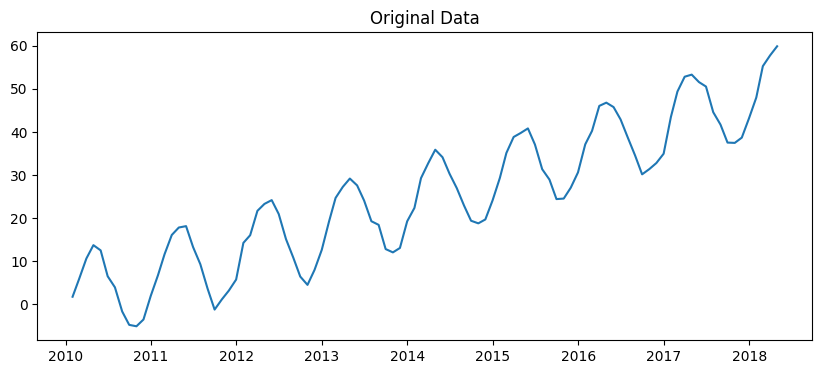

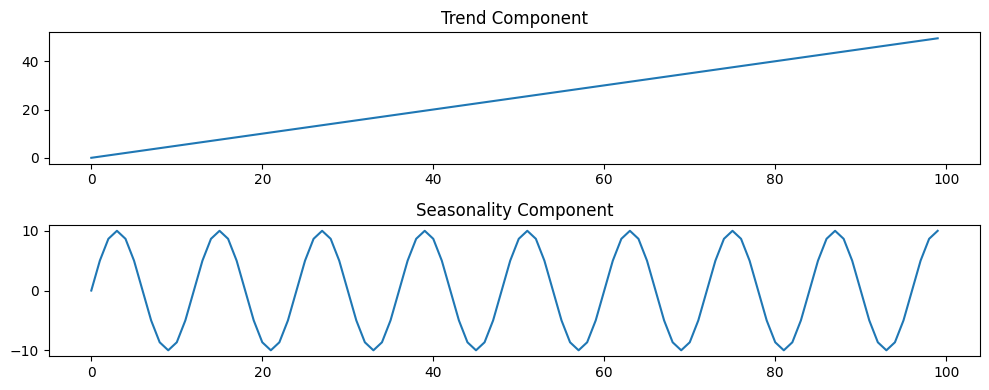

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
n = 100
time = pd.date_range(start='2010-01-01', periods=n, freq='M')
t = np.arange(n)
trend = 0.5 * t
seasonality = 10 * np.sin(2 * np.pi * t / 12)
noise = np.random.normal(0, 1, n)
data = trend + seasonality + noise

# Convert data to a Pandas Series with a DatetimeIndex
series = pd.Series(data, index=time)

# Plot original data
plt.figure(figsize=(10, 4))
plt.plot(series)
plt.title('Original Data')
plt.show()

# Algebraic functions for trend and seasonality
def trend_function(t):
    return 0.5 * t

def seasonality_function(t):
    return 10 * np.sin(2 * np.pi * t / 12)

# Calculate trend and seasonality using the algebraic functions
trend_component = trend_function(t)
seasonality_component = seasonality_function(t)

# Plot trend and seasonality components
plt.figure(figsize=(10, 4))

plt.subplot(211)
plt.plot(trend_component)
plt.title('Trend Component')

plt.subplot(212)
plt.plot(seasonality_component)
plt.title('Seasonality Component')

plt.tight_layout()
plt.show()


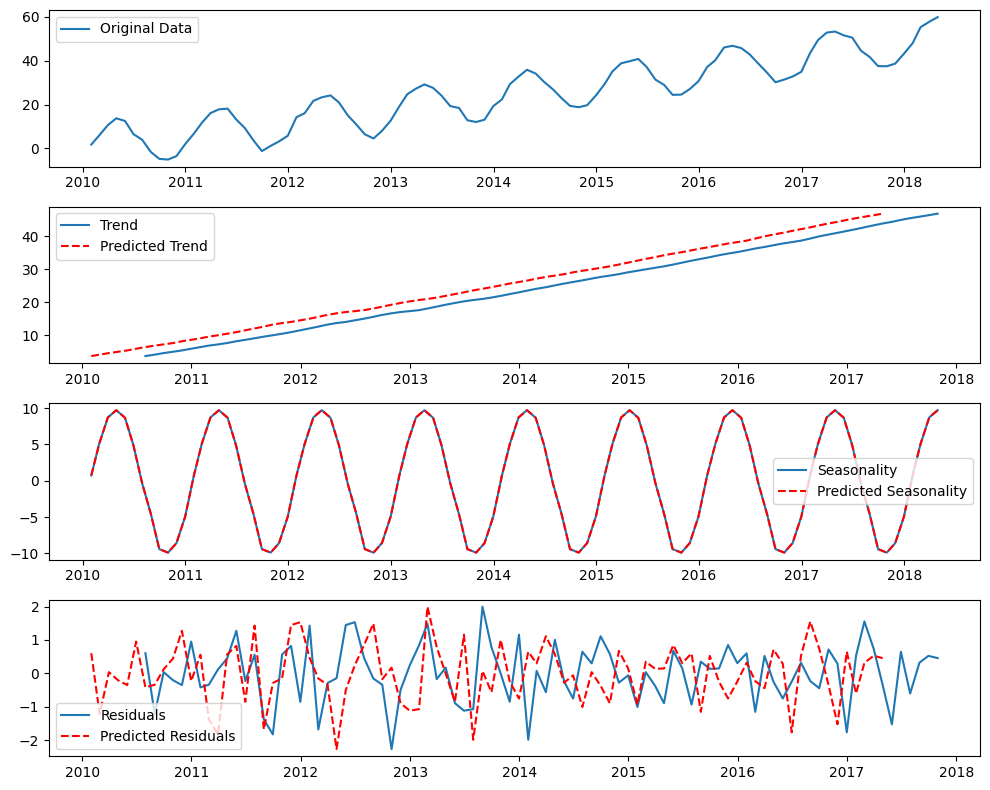

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Generate synthetic data
np.random.seed(0)
n = 100
time = pd.date_range(start='2010-01-01', periods=n, freq='M')
trend = 0.5 * np.arange(n)
seasonality = 10 * np.sin(2 * np.pi * np.arange(n) / 12)
noise = np.random.normal(0, 1, n)
data = trend + seasonality + noise

# Convert data to a Pandas Series with a DatetimeIndex
series = pd.Series(data, index=time)

# Perform time series decomposition
decomposition = seasonal_decompose(series, model='additive')

# Access decomposition components
trend_component = decomposition.trend
seasonality_component = decomposition.seasonal
residual_component = decomposition.resid

# Predict the trend component
def predict_trend(time):
    predicted_trend = trend_component.dropna()
    return predicted_trend

# Predict the seasonality component
def predict_seasonality(time):
    predicted_seasonality = seasonality_component.dropna()
    return predicted_seasonality

# Predict the residuals
def predict_residuals(time):
    predicted_residuals = residual_component.dropna()
    return predicted_residuals

# Example usage: Predict components for the first 10 time points
predicted_trend = predict_trend(time[:10])
predicted_seasonality = predict_seasonality(time[:10])
predicted_residuals = predict_residuals(time[:10])

# Plot original data and components
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(series, label='Original Data')
plt.legend()

plt.subplot(412)
plt.plot(trend_component, label='Trend')
plt.plot(time[:len(predicted_trend)], predicted_trend, 'r--', label='Predicted Trend')
plt.legend()

plt.subplot(413)
plt.plot(seasonality_component, label='Seasonality')
plt.plot(time[:len(predicted_seasonality)], predicted_seasonality, 'r--', label='Predicted Seasonality')
plt.legend()

plt.subplot(414)
plt.plot(residual_component, label='Residuals')
plt.plot(time[:len(predicted_residuals)], predicted_residuals, 'r--', label='Predicted Residuals')
plt.legend()

plt.tight_layout()
plt.show()


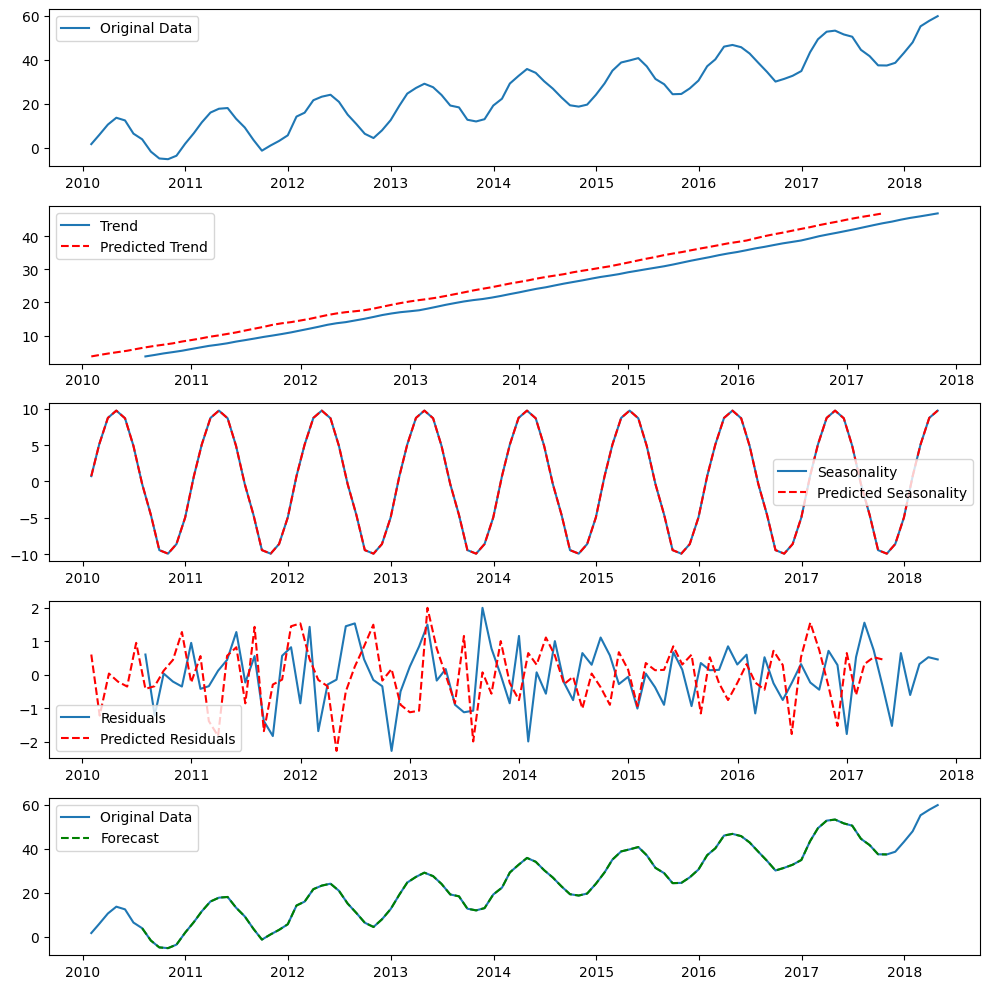

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Generate synthetic data
np.random.seed(0)
n = 100
time = pd.date_range(start='2010-01-01', periods=n, freq='M')
trend = 0.5 * np.arange(n)
seasonality = 10 * np.sin(2 * np.pi * np.arange(n) / 12)
noise = np.random.normal(0, 1, n)
data = trend + seasonality + noise

# Convert data to a Pandas Series with a DatetimeIndex
series = pd.Series(data, index=time)

# Perform time series decomposition
decomposition = seasonal_decompose(series, model='additive')

# Access decomposition components
trend_component = decomposition.trend
seasonality_component = decomposition.seasonal
residual_component = decomposition.resid

# Predict the trend component
def predict_trend(time):
    predicted_trend = trend_component.dropna()
    return predicted_trend

# Predict the seasonality component
def predict_seasonality(time):
    predicted_seasonality = seasonality_component.dropna()
    return predicted_seasonality

# Predict the residuals
def predict_residuals(time):
    predicted_residuals = residual_component.dropna()
    return predicted_residuals

# Predict the composed forecasted data
def predict_forecast(time):
    predicted_trend = predict_trend(time)
    predicted_seasonality = predict_seasonality(time)
    predicted_residuals = predict_residuals(time)
    forecast = predicted_trend + predicted_seasonality + predicted_residuals
    return forecast

# Example usage: Predict components and forecast for the first 10 time points
predicted_trend = predict_trend(time[:10])
predicted_seasonality = predict_seasonality(time[:10])
predicted_residuals = predict_residuals(time[:10])
forecast = predict_forecast(time[:10])

# Plot original data, components, and forecast
plt.figure(figsize=(10, 10))

plt.subplot(511)
plt.plot(series, label='Original Data')
plt.legend()

plt.subplot(512)
plt.plot(trend_component, label='Trend')
plt.plot(time[:len(predicted_trend)], predicted_trend, 'r--', label='Predicted Trend')
plt.legend()

plt.subplot(513)
plt.plot(seasonality_component, label='Seasonality')
plt.plot(time[:len(predicted_seasonality)], predicted_seasonality, 'r--', label='Predicted Seasonality')
plt.legend()

plt.subplot(514)
plt.plot(residual_component, label='Residuals')
plt.plot(time[:len(predicted_residuals)], predicted_residuals, 'r--', label='Predicted Residuals')
plt.legend()

plt.subplot(515)
plt.plot(series, label='Original Data')
plt.plot(time[:len(forecast)], forecast, 'g--', label='Forecast')
plt.legend()

plt.tight_layout()
plt.show()


The above code uses the additive decomposition method provided by the seasonal_decompose function from the statsmodels.tsa.seasonal module. This method assumes that the time series data can be decomposed into the sum of trend, seasonality, and residual components.

The seasonal_decompose function performs the decomposition by applying moving averages and differencing operations to the original data. It estimates the trend and seasonal components using these operations and calculates the residuals as the difference between the original data and the estimated trend and seasonality.

To predict the components (trend, seasonality, residuals) and the forecasted data, the code uses the observed data to fit the additive decomposition model and then extracts the estimated components and residuals from the decomposition result. The predicted components are obtained by dropping any missing values in the estimated components.

It's important to note that the choice of the additive decomposition method may not be suitable for all time series data. Depending on the characteristics of your data, you may need to consider alternative decomposition methods, such as multiplicative decomposition or other advanced time series forecasting techniques.

Additionally, the quality of the predictions will depend on the accuracy of the decomposition and the underlying assumptions of the additive model. It's always recommended to evaluate the performance of the predictions using appropriate metrics and consider the specific characteristics and behavior of your time series data.